In [1]:
import pandas as pd
df=pd.DataFrame()

In [3]:
df1 = pd.read_csv('/home/sasidharreddy/study/OELP_sem6/new_code/data.csv')
df=df1[['idates','imonths','iyears','obs']]
df.to_csv('new_output_file.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

/tmp/ipykernel_11553/2716774584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))


In [4]:
df.tail()

,obs
datetime,
2020-12-21,0.0
2020-12-22,0.0
2020-12-23,0.0
2020-12-24,0.0
2020-12-25,0.0


<AxesSubplot:xlabel='datetime'>

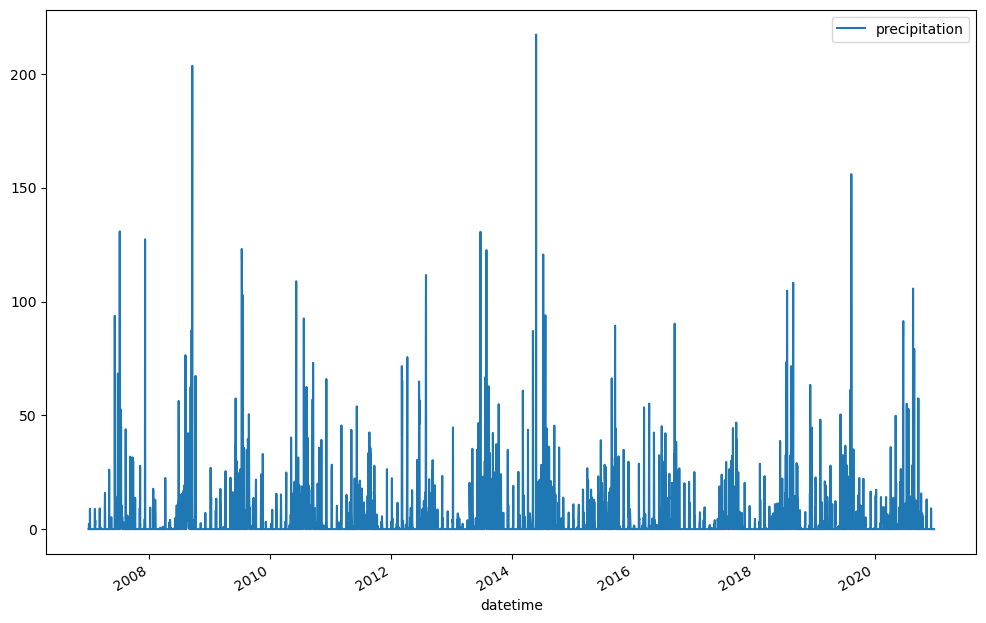

In [11]:
df.columns = ['precipitation']
df.plot(figsize=(12,8))

In [14]:
df['prev_day']=df['precipitation'].shift(+30)
df['2_days_back']=df['precipitation'].shift(+60)
df['3_days_back']=df['precipitation'].shift(+90)
df['4_days_back']=df['precipitation'].shift(+120)
df['5_days_back']=df['precipitation'].shift(+150)
df['6_days_back']=df['precipitation'].shift(+180)
df

,precipitation,prev_day,2_days_back,3_days_back,4_days_back,5_days_back,6_days_back
datetime,,,,,,,
2007-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-21,0.0,0.0,0.0,8.97,0.00,14.11,0.00
2020-12-22,0.0,0.0,0.0,0.00,6.49,0.00,0.00
2020-12-23,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [15]:
df=df.dropna()
df

,precipitation,prev_day,2_days_back,3_days_back,4_days_back,5_days_back,6_days_back
datetime,,,,,,,
2007-10-07,9.72,0.0,1.75,0.00,0.00,0.00,0.00
2007-11-07,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2007-12-07,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2007-07-13,22.14,0.0,0.00,0.00,0.00,0.00,0.00
2007-07-14,52.72,0.0,26.14,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
2020-12-21,0.00,0.0,0.00,8.97,0.00,14.11,0.00
2020-12-22,0.00,0.0,0.00,0.00,6.49,0.00,0.00
2020-12-23,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [16]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
import numpy as np
x1,x2,x3,y=df['prev_day'],df['2_days_back'],df['Sale_3Monthsback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

example


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:35:33] WARNING: /workspace/src/common/error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)
Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x70d1f1deb340>>
Traceback (most recent call last):
  File "/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py", line 641, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/home/sasidharreddy/.local/lib/python3.10/site-packages/xgboost/core.py", line 557, in _handle_exception
    return fn()
  File "/home/sasidharreddy/.local/lib/python3.